# Diffrax Intuition & Examples

In [2]:
import diffrax
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

## "Getting Started" Examples
https://docs.kidger.site/diffrax/usage/getting-started/

### ODE

/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


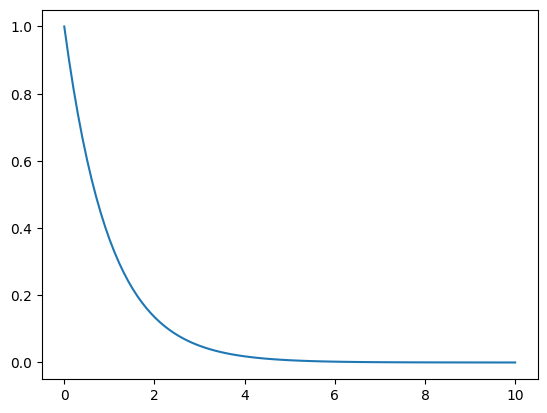

In [3]:
from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt, PIDController

vector_field = lambda t, y, args: -y
term = ODETerm(vector_field)
solver = Dopri5()
tf = 10
t = np.linspace(0,10,100)
saveat = SaveAt(ts=t)
stepsize_controller = PIDController(rtol=1e-5, atol=1e-5)

sol = diffeqsolve(term, solver, t0=0, t1=tf, dt0=0.1, y0=1, saveat=saveat,
                  stepsize_controller=stepsize_controller)
plt.plot(sol.ts, sol.ys)

### SDEs

/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


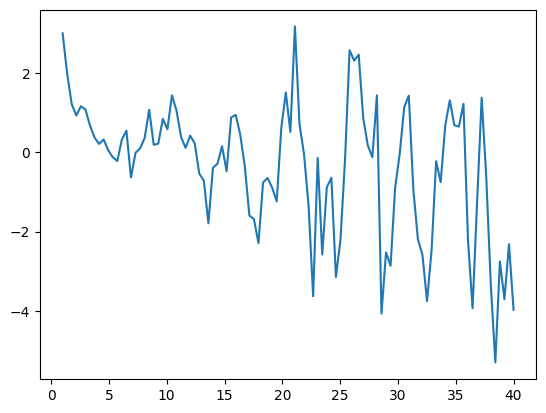

In [4]:
import jax.random as jr
from diffrax import diffeqsolve, ControlTerm, Euler, MultiTerm, ODETerm, SaveAt, VirtualBrownianTree

t0, t1 = 1, 40
drift = lambda t, y, args: -y
diffusion = lambda t, y, args: .1 + .1*t
brownian_motion = VirtualBrownianTree(t0, t1, tol=1e-3, shape=(), key=jr.PRNGKey(0))
terms = MultiTerm(ODETerm(drift), ControlTerm(diffusion, brownian_motion))
solver = Euler()
saveat = SaveAt(dense=True)

sol = diffeqsolve(terms, solver, t0, t1, dt0=0.05, y0=3.0, saveat=saveat)
times = jnp.linspace(t0,t1,100)
plt.plot(times,sol.evaluate(times))

### Controlled Differential Equations (CDEs)

/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


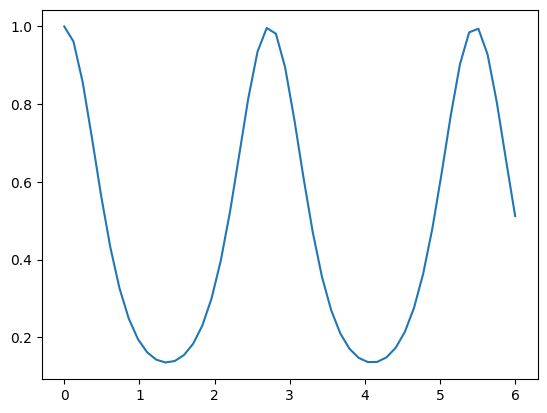

In [5]:
from diffrax import AbstractPath, ControlTerm, diffeqsolve, Dopri5

t0 = 0
t1 = 6
class QuadraticPath(AbstractPath):
    @property
    def t0(self):
        return t0

    @property
    def t1(self):
        return t1

    def evaluate(self, t0, t1=None, left=True):
        del left
        if t1 is not None:
            return self.evaluate(t1) - self.evaluate(t0)
        return -jnp.cos(2.3*t0)


vector_field = lambda t, y, args: -y
control = QuadraticPath()
term = ControlTerm(vector_field, control).to_ode()
solver = Dopri5()
t = np.linspace(t0,t1)
sol = diffeqsolve(term, solver, t0=t0, t1=t1, dt0=0.05, y0=1, saveat=SaveAt(ts=t))

plt.plot(t,sol.ys)

## Interactive Callback

In [6]:
import jax.numpy as jnp
from diffrax import ODETerm, Tsit5

vector_field = lambda t, y, args: -y
term = ODETerm(vector_field)
solver = Tsit5()

t0 = 0
dt0 = 0.05
t1 = 1
y0 = jnp.array(1.0)
args = None

tprev = t0
tnext = t0 + dt0
y = y0
state = solver.init(term, tprev, tnext, y0, args)

while tprev < t1:
    y, _, _, state, _ = solver.step(term, tprev, tnext, y, args, state, made_jump=False)
    print(f"At time {tnext} obtained value {y}, state = {state}")
    tprev = tnext
    tnext = min(tprev + dt0, t1)

At time 0.05 obtained value 0.9512293934822083, state = (False, Array(-0.9512294, dtype=float32))
At time 0.1 obtained value 0.9048373699188232, state = (False, Array(-0.90483737, dtype=float32))
At time 0.15000000000000002 obtained value 0.8607079386711121, state = (False, Array(-0.86070794, dtype=float32))
At time 0.2 obtained value 0.8187307119369507, state = (False, Array(-0.8187307, dtype=float32))
At time 0.25 obtained value 0.7788007259368896, state = (False, Array(-0.7788007, dtype=float32))
At time 0.3 obtained value 0.7408181428909302, state = (False, Array(-0.74081814, dtype=float32))
At time 0.35 obtained value 0.7046880125999451, state = (False, Array(-0.704688, dtype=float32))
At time 0.39999999999999997 obtained value 0.6703199744224548, state = (False, Array(-0.67032, dtype=float32))
At time 0.44999999999999996 obtained value 0.6376280784606934, state = (False, Array(-0.6376281, dtype=float32))
At time 0.49999999999999994 obtained value 0.6065305471420288, state = (Fals

## Neural ODE Training

In [7]:
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax  # https://github.com/deepmind/optax

In [8]:
class Func(eqx.Module):
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.mlp = eqx.nn.MLP(
            in_size=data_size,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y)

In [9]:
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        solution = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=ts[1] - ts[0],
            y0=y0,
            stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
            saveat=diffrax.SaveAt(ts=ts),
        )
        return solution.ys

In [10]:
def _get_data(ts, *, key):
    y0 = jr.uniform(key, (2,), minval=-0.6, maxval=1)

    def f(t, y, args):
        x = y / (1 + y)
        return jnp.stack([x[1], -x[0]], axis=-1)

    solver = diffrax.Tsit5()
    dt0 = 0.1
    saveat = diffrax.SaveAt(ts=ts)
    sol = diffrax.diffeqsolve(
        diffrax.ODETerm(f), solver, ts[0], t1=ts[-1], dt0=dt0, y0=y0, saveat=saveat
    )
    ys = sol.ys
    return ys


def get_data(dataset_size, *, key):
    ts = jnp.linspace(0, 10, 100)
    key = jr.split(key, dataset_size)
    ys = jax.vmap(lambda key: _get_data(ts, key=key))(key)
    return ts, ys

In [11]:
def dataloader(arrays, batch_size, *, key):
    dataset_size = arrays[0].shape[0]
    assert all(array.shape[0] == dataset_size for array in arrays)
    indices = jnp.arange(dataset_size)
    while True:
        perm = jr.permutation(key, indices)
        (key,) = jr.split(key, 1)
        start = 0
        end = batch_size
        while end < dataset_size:
            batch_perm = perm[start:end]
            yield tuple(array[batch_perm] for array in arrays)
            start = end
            end = start + batch_size

In [12]:
def driver(
    dataset_size=256,
    batch_size=32,
    lr_strategy=(3e-3, 3e-3),
    steps_strategy=(500, 500),
    length_strategy=(0.1, 1),
    width_size=64,
    depth=2,
    seed=5678,
    plot=True,
    print_every=100,
):
    key = jr.PRNGKey(seed)
    data_key, model_key, loader_key = jr.split(key, 3)

    ts, ys = get_data(dataset_size, key=data_key)
    _, length_size, data_size = ys.shape

    model = NeuralODE(data_size, width_size, depth, key=model_key)

    # Training loop like normal.
    #
    # Only thing to notice is that up until step 500 we train on only the first 10% of
    # each time series. This is a standard trick to avoid getting caught in a local
    # minimum.

    @eqx.filter_value_and_grad
    def grad_loss(model, ti, yi):
        y_pred = jax.vmap(model, in_axes=(None, 0))(ti, yi[:, 0])
        return jnp.mean((yi - y_pred) ** 2)

    @eqx.filter_jit
    def make_step(ti, yi, model, opt_state):
        loss, grads = grad_loss(model, ti, yi)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    for lr, steps, length in zip(lr_strategy, steps_strategy, length_strategy):
        optim = optax.adabelief(lr)
        opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))
        _ts = ts[: int(length_size * length)]
        _ys = ys[:, : int(length_size * length)]
        for step, (yi,) in zip(
            range(steps), dataloader((_ys,), batch_size, key=loader_key)
        ):
            start = time.time()
            loss, model, opt_state = make_step(_ts, yi, model, opt_state)
            end = time.time()
            if (step % print_every) == 0 or step == steps - 1:
                print(f"Step: {step}, Loss: {loss}, Computation time: {end - start}")

    if plot:
        plt.plot(ts, ys[0, :, 0], c="dodgerblue", label="Real")
        plt.plot(ts, ys[0, :, 1], c="dodgerblue")
        model_y = model(ts, ys[0, 0])
        plt.plot(ts, model_y[:, 0], c="crimson", label="Model")
        plt.plot(ts, model_y[:, 1], c="crimson")
        plt.legend()
        plt.tight_layout()
        plt.savefig("neural_ode.png")
        plt.show()

    return ts, ys, model

/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Atte

Step: 0, Loss: 0.1665811836719513, Computation time: 7.9513866901397705
Step: 100, Loss: 0.011158624663949013, Computation time: 0.03408098220825195
Step: 200, Loss: 0.006482105236500502, Computation time: 0.03080296516418457
Step: 300, Loss: 0.0013779059518128633, Computation time: 0.022835254669189453
Step: 400, Loss: 0.0010753555689007044, Computation time: 0.025115251541137695
Step: 499, Loss: 0.0007981734233908355, Computation time: 0.0251619815826416


/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/home/cjb/miniconda3/envs/jiang/lib/python3.12/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


Step: 0, Loss: 0.028269000351428986, Computation time: 7.814599990844727
Step: 100, Loss: 0.0054036760702729225, Computation time: 0.15795493125915527
Step: 200, Loss: 0.004386062268167734, Computation time: 0.15457773208618164
Step: 300, Loss: 0.0018275752663612366, Computation time: 0.16925311088562012
Step: 400, Loss: 0.001574797322973609, Computation time: 0.15606045722961426
Step: 499, Loss: 0.0010693579679355025, Computation time: 0.15459060668945312


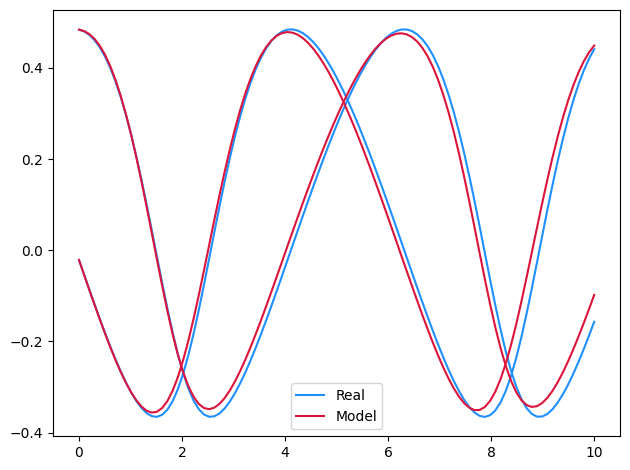

In [13]:
ts, ys, model = driver()


#### VMAP Aside

In [14]:
def custom_dot(x, y):
    return jnp.dot(x, y) ** 2
x = jnp.asarray([
    [2, 2, 2],
    [3, 3, 3]
])
y = jnp.asarray([
    [4, 4, 4],
    [5, 5, 5]
])
#custom_dot(x, y) # fails
def naive_custom_dot(x_batched, y_batched):
    return jnp.stack([
        custom_dot(v1, v2)
        for v1, v2 in zip(x_batched, y_batched)
    ]
    )
print(f"Naive: {naive_custom_dot(x,y)}")
vmap_custom_dot = jax.vmap(custom_dot, in_axes=[0,0])
print(f"Vmap: {vmap_custom_dot(x,y)}")

Naive: [ 576 2025]
Vmap: [ 576 2025]


### Steady State + Backprop

In [18]:
import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax.numpy as jnp
import optax  # https://github.com/deepmind/optax

In [19]:
class ExponentialDecayToSteadyState(eqx.Module):
    steady_state: float

    def __call__(self, t, y, args):
        return self.steady_state - y

In [24]:
def loss(model, target_steady_state):
    # This combination of event, t1, max_steps, adjoint is particularly
    # natural: we keep integration forever until we hit the event, with
    # no maximum time or number of steps. Backpropagation happens via
    # the implicit function theorem.
    sol = diffrax.diffeqsolve(
        terms=diffrax.ODETerm(model),
        solver=diffrax.Tsit5(),
        t0=0,
        t1=jnp.inf,
        dt0=None,
        y0=1,
        max_steps=None,
        stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
        event=diffrax.Event(diffrax.steady_state_event()),
        adjoint=diffrax.ImplicitAdjoint(), # this must be the implicit adjoint because max-steps is uncapped - involves matrix inversion at each step
    )
    (y1,) = sol.ys
    return (y1 - target_steady_state) ** 2

In [25]:
model = ExponentialDecayToSteadyState(
    steady_state=jnp.array(0.0)
)  # initial steady state guess is 0.
# target steady state is 0.76
target_steady_state = jnp.array(0.76)
optim = optax.sgd(1e-2, momentum=0.7, nesterov=True)
opt_state = optim.init(model)


@eqx.filter_jit
def make_step(model, opt_state, target_steady_state):
    grads = eqx.filter_grad(loss)(model, target_steady_state)
    print(grads)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(model, updates)
    return model, opt_state

import time
import numpy as np
t0_timing = time.time()
for step in range(100):
    model, opt_state = make_step(model, opt_state, target_steady_state)
    print(f"Step: {step} Steady State: {model.steady_state}")
t1_timing = time.time()
print(f"Target: {target_steady_state}, Time: {np.round(t1_timing-t0_timing)}")

ExponentialDecayToSteadyState(steady_state=f32[])
Step: 0 Steady State: 0.025839975103735924
Step: 1 Steady State: 0.05824904143810272
Step: 2 Steady State: 0.09451573342084885
Step: 3 Steady State: 0.1327040046453476
Step: 4 Steady State: 0.1714443862438202
Step: 5 Steady State: 0.20979034900665283
Step: 6 Steady State: 0.2470988631248474
Step: 7 Steady State: 0.2829493284225464
Step: 8 Steady State: 0.3170771598815918
Step: 9 Steady State: 0.3493441343307495
Step: 10 Steady State: 0.37968963384628296
Step: 11 Steady State: 0.4081103503704071
Step: 12 Steady State: 0.4346424341201782
Step: 13 Steady State: 0.4593484401702881
Step: 14 Steady State: 0.48230770230293274
Step: 15 Steady State: 0.5036095976829529
Step: 16 Steady State: 0.5233357548713684
Step: 17 Steady State: 0.5415931940078735
Step: 18 Steady State: 0.5584786534309387
Step: 19 Steady State: 0.5740857124328613
Step: 20 Steady State: 0.5885041952133179
Step: 21 Steady State: 0.6018193364143372
Step: 22 Steady State: 0.6141